<a href="https://colab.research.google.com/github/nanochiplab/Makine_Ogrenmesi/blob/main/Vize_%C3%96devi_Makine_%C3%96%C4%9Frenmesi_7_son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #pandas kütüphanesini içe aktarır ve ona pd takma adını atar.
import numpy as  np #numpy kütüphanesini içe aktarır ve ona np takma adını atar
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
df=pd.read_excel('Dry_Bean_Dataset.xlsx')
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [ ]:
#%5 ve %35 MISSİNG VALUE İLE DOLDURMA
for col in ['Area', 'Perimeter']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

df.loc[df.sample(frac=0.35).index, 'ConvexArea'] = np.nan

#df.to_excel("Dry_Bean_Missing.xlsx", index=False)
df.to_csv("Dry_Bean_Missing_Example.csv", index=False)
df.isnull().sum()

,0
Area,681
Perimeter,681
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,4764
EquivDiameter,0
Extent,0
Solidity,0


In [ ]:
# Ortalamaları hesapla
ortalama_area = round(df['Area'].mean())
ortalama_perimeter = round(df['Perimeter'].mean(), 3)

# NaN değerlerini ortalama ile doldur
df['Area'] = df['Area'].fillna(ortalama_area)
df['Perimeter'] = df['Perimeter'].fillna(ortalama_perimeter)

df.isnull().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,4764
EquivDiameter,0
Extent,0
Solidity,0


In [ ]:
# %35'lik nan içeren ConvexArea satırlarını silme
df = df.dropna(subset=['ConvexArea'])
df.isnull().sum()

,0
Area,0
Perimeter,0
MajorAxisLength,0
MinorAxisLength,0
AspectRation,0
Eccentricity,0
ConvexArea,0
EquivDiameter,0
Extent,0
Solidity,0


In [ ]:
from scipy import stats
def aykiri_degerleri_bul_zscore(df, sutunlar, esik=3):
    aykiri_indeksler = []
    for sutun in sutunlar:
        zscores = np.abs(stats.zscore(df[sutun]))
        sutun_aykiri_indeksler = df[zscores > esik].index
        aykiri_indeksler.extend(sutun_aykiri_indeksler)

    aykiri_indeksler = list(set(aykiri_indeksler))
    return aykiri_indeksler

In [ ]:
sayisal_sutunlar = df.select_dtypes(include=np.number).columns.tolist()
print(sayisal_sutunlar)
print("")
df.info()

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

<class 'pandas.core.frame.DataFrame'>
Index: 8847 entries, 4 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8847 non-null   float64
 1   Perimeter        8847 non-null   float64
 2   MajorAxisLength  8847 non-null   float64
 3   MinorAxisLength  8847 non-null   float64
 4   AspectRation     8847 non-null   float64
 5   Eccentricity     8847 non-null   float64
 6   ConvexArea       8847 non-null   float64
 7   EquivDiameter    8847 non-null   float64
 8   Extent           8847 non-null   float64
 9   Solidity         8847 non-null   float64
 10  roundness        8847 non-null   float64
 11  Compactness      8847 non-null   float64
 12  ShapeFacto

In [ ]:
aykiri_indeksler = aykiri_degerleri_bul_zscore(df, sayisal_sutunlar)
df.loc[aykiri_indeksler]  # Aykırı değerleri içeren satırları görüntüle
df = df.drop(aykiri_indeksler)  # Aykırı değerleri içeren satırları sil
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8121 entries, 5 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             8121 non-null   float64
 1   Perimeter        8121 non-null   float64
 2   MajorAxisLength  8121 non-null   float64
 3   MinorAxisLength  8121 non-null   float64
 4   AspectRation     8121 non-null   float64
 5   Eccentricity     8121 non-null   float64
 6   ConvexArea       8121 non-null   float64
 7   EquivDiameter    8121 non-null   float64
 8   Extent           8121 non-null   float64
 9   Solidity         8121 non-null   float64
 10  roundness        8121 non-null   float64
 11  Compactness      8121 non-null   float64
 12  ShapeFactor1     8121 non-null   float64
 13  ShapeFactor2     8121 non-null   float64
 14  ShapeFactor3     8121 non-null   float64
 15  ShapeFactor4     8121 non-null   float64
 16  Class            8121 non-null   object 
dtypes: float64(16), ob

In [ ]:
from sklearn.preprocessing import StandardScaler

# Sayısal sütunları seçin
sayisal_sutunlar = df.select_dtypes(include=np.number).drop(columns=['class'], errors='ignore').columns.tolist()

# StandardScaler nesnesi oluşturun
scaler = StandardScaler()

# Verileri ölçeklendirin
olcekli_veri = scaler.fit_transform(df[sayisal_sutunlar])

# Ölçeklendirilmiş verileri görüntüleyin
print(df.head())

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
5   30279.0    634.927       212.560556       181.510182      1.171067   
6   30477.0    670.033       211.050155       184.039050      1.146768   
9   30834.0    631.934       217.227813       180.897469      1.200834   
10  30917.0    640.765       213.560089       184.439871      1.157885   
12  31107.0    640.594       214.648549       184.969253      1.160455   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
5       0.520401     30600.0     196.347702  0.775688  0.989510   0.943852   
6       0.489478     30970.0     196.988633  0.762402  0.984081   0.853080   
9       0.553642     31120.0     198.139012  0.783683  0.990810   0.970278   
10      0.504102     31280.0     198.405512  0.770805  0.988395   0.946258   
12      0.507366     31423.0     199.014227  0.761046  0.989944   0.952582   

    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
5    

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluşturduk
etiketle = LabelEncoder()

# Sınıf etiketlerini içeren sütunu seçin (örneğin, 'class' sütunu)
sinif_etiketi_sutunu = 'Class'

# Sınıf etiketlerini numerik hale getirin
df[sinif_etiketi_sutunu] = etiketle.fit_transform(df[sinif_etiketi_sutunu])
df.to_excel("Dry_Bean_Missing4.xlsx", index=False)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA nesnesi oluşturun
pca = PCA()

# Ölçeklendirilmiş verilere PCA uygulayın
principal_components = pca.fit_transform(olcekli_veri)

# Açıklanan varyans oranlarını alın
# Açıklanan varyans oranlarını görüntüleyin
print(pca.explained_variance_ratio_)
explained_variance_ratios = pca.explained_variance_ratio_

[6.01523122e-01 2.26740646e-01 6.76347365e-02 5.31202379e-02
 3.02647832e-02 7.89385879e-03 4.77062450e-03 3.23722805e-03
 2.84845764e-03 1.49661033e-03 4.13812599e-04 4.08674172e-05
 1.01114666e-05 4.71479286e-06 1.30010954e-07 5.93282232e-08]


In [ ]:
# Açıklanan varyans oranlarının ortalamasını hesaplayın
ortalama_varyans = np.mean(explained_variance_ratios)

# Ortalamadan büyük olan varyans oranlarının indekslerini bulun
bileşen_sayisi = np.where(explained_variance_ratios > ortalama_varyans)[0].shape[0]

# PCA nesnesini belirlenen bileşen sayısı ile yeniden oluşturun
X_pca = PCA(n_components=bileşen_sayisi)
principal_components = X_pca.fit_transform(olcekli_veri)

# Açıklanan varyans oranlarını görüntüleyin
print(X_pca.explained_variance_ratio_)

# Açıklanan varyans oranlarının kümülatif toplamını görüntüleyin
print(np.cumsum(X_pca.explained_variance_ratio_))

[0.60152312 0.22674065 0.06763474]
[0.60152312 0.82826377 0.8958985 ]


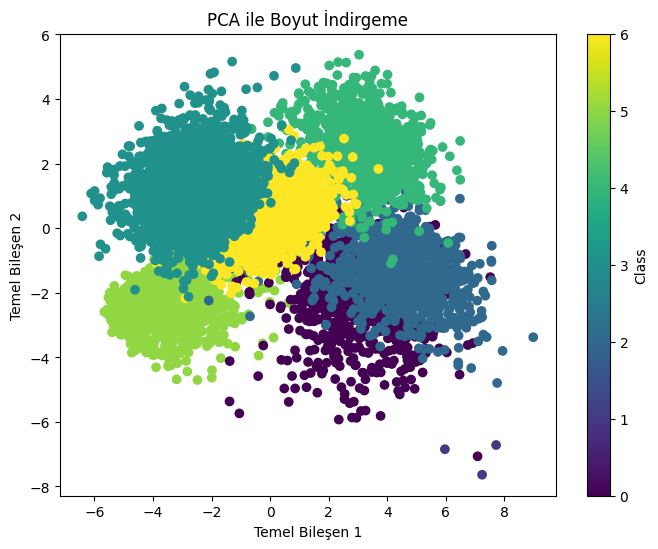

In [ ]:
# İlk iki temel bileşeni alın
PC1 = principal_components[:, 0]
PC2 = principal_components[:, 1]

# Sınıf etiketlerini alın
sinif_etiketleri = df['Class']

# Grafik oluşturun
plt.figure(figsize=(8, 6))
plt.scatter(PC1, PC2, c=sinif_etiketleri, cmap='viridis')
plt.xlabel('Temel Bileşen 1')
plt.ylabel('Temel Bileşen 2')
plt.title('PCA ile Boyut İndirgeme')
plt.colorbar(label='Class')
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA nesnesi oluşturun ve bileşen sayısını 3 olarak belirleyin
X_lda = LDA(n_components=3)

# Ölçeklendirilmiş verilere ve sınıf etiketlerine LDA uygulayın
lda_components = X_lda.fit_transform(olcekli_veri, df['Class'])

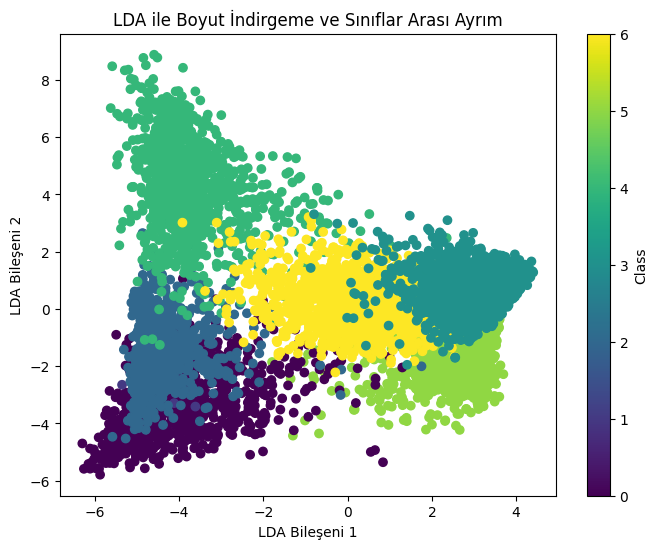

In [ ]:
# İlk iki LDA bileşenini alın
LDA1 = lda_components[:, 0]
LDA2 = lda_components[:, 1]

# Sınıf etiketlerini alın
sinif_etiketleri = df['Class']

# Grafik oluşturun
plt.figure(figsize=(8, 6))
plt.scatter(LDA1, LDA2, c=sinif_etiketleri, cmap='viridis')
plt.xlabel('LDA Bileşeni 1')
plt.ylabel('LDA Bileşeni 2')
plt.title('LDA ile Boyut İndirgeme ve Sınıflar Arası Ayrım')
plt.colorbar(label='Class')
plt.show()

In [ ]:
# ... (LDA kodunuz) ...

# LDA1 bileşenini görüntüleyin
print(X_lda.scalings_[:, 0])  # Öznitelik ağırlıkları
#print(lda_components[:, 0])  # Bileşen değerleri

# Pandas DataFrame'ine dönüştürün ve görüntüleyin
#lda_df = pd.DataFrame(lda_components, columns=['LDA1', 'LDA2', 'LDA3'])
#print(lda_df['LDA1'])

[-4.82535523e-02 -4.73991225e-03  6.06745080e+01  1.85726099e+01
 -1.90744082e+00 -6.52225345e+00  2.15020764e+01 -1.02310698e+02
 -8.29610329e-02  3.75596329e-01  3.76300571e-01  6.39006905e+01
 -1.71433666e+00 -1.79517116e+01 -4.80998966e+01  6.95310326e-01]


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB  # Import Naive Bayes


# Sınıflandırıcıları bir listede toplayın

classifiers = {
'LogisticRegression': {
        'model': LogisticRegression(random_state=12, max_iter=10),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(random_state=12),
        'params': {
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10]
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=12),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7]
        }
    },
    'XGBClassifier': {
        'model': XGBClassifier(random_state=12),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

#Kodu dikkatli kullanın
#Adım 2: Veri temsillerini hazırlayın:

# 1. Ham veri
X_raw = df.drop('Class', axis=1)
y = df['Class']

# Veri temsillerini bir sözlükte toplayın
data_representations = {
    'Ham Veri': X_raw,
    'PCA Dönüştürülmüş Veri': X_pca,
    'LDA Dönüştürülmüş Veri': X_lda
}

              Veri Temsili                   Model  Ortalama Accuracy  \
0                 Ham Veri      LogisticRegression           0.206869   
1                 Ham Veri              GaussianNB           0.769487   
2                 Ham Veri  DecisionTreeClassifier           0.900259   
3                 Ham Veri  RandomForestClassifier           0.909617   
4                 Ham Veri           XGBClassifier           0.921930   
5   PCA Dönüştürülmüş Veri      LogisticRegression           0.878094   
6   PCA Dönüştürülmüş Veri              GaussianNB           0.874522   
7   PCA Dönüştürülmüş Veri  DecisionTreeClassifier           0.869105   
8   PCA Dönüştürülmüş Veri  RandomForestClassifier           0.877847   
9   PCA Dönüştürülmüş Veri           XGBClassifier           0.879449   
10  LDA Dönüştürülmüş Veri      LogisticRegression           0.890777   
11  LDA Dönüştürülmüş Veri              GaussianNB           0.886960   
12  LDA Dönüştürülmüş Veri  DecisionTreeClassifier 

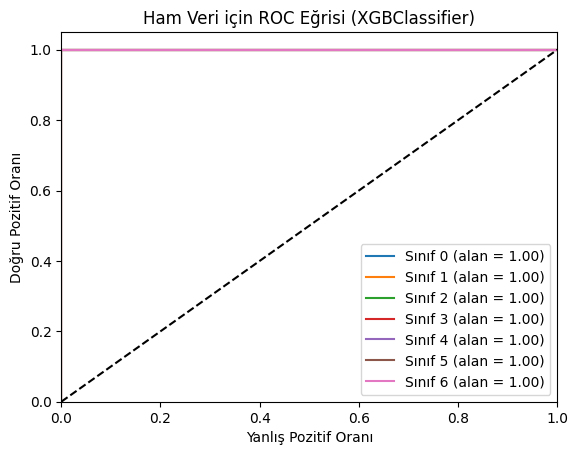

Ham Veri için ROC-AUC Skorları (XGBClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


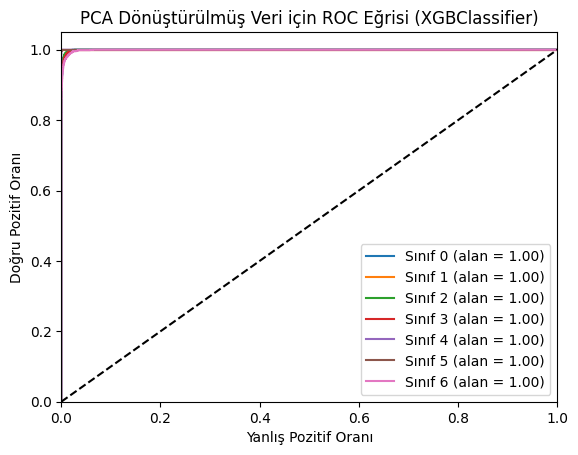

PCA Dönüştürülmüş Veri için ROC-AUC Skorları (XGBClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


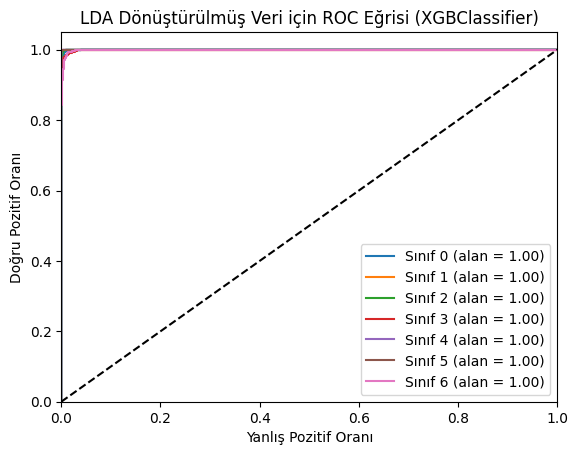

LDA Dönüştürülmüş Veri için ROC-AUC Skorları (XGBClassifier):
Sınıf 0: 1.00
Sınıf 1: 1.00
Sınıf 2: 1.00
Sınıf 3: 1.00
Sınıf 4: 1.00
Sınıf 5: 1.00
Sınıf 6: 1.00


In [ ]:
#!pip install xgboost
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV # GridSearchCV'yi import et
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier  # OneVsRestClassifier eklendi
import matplotlib.pyplot as plt

# ... (Veri yükleme, ön işleme ve model tanımları için mevcut kodunuz) ...

out_cv = KFold(n_splits=5, shuffle=True, random_state=42)  # CV nesnesi
in_cv = KFold(n_splits=3, shuffle=True, random_state=42)  # CV nesnesi

results = []
best_models = {}  # Her veri temsili için en iyi modelleri saklayın

for data_name, X in data_representations.items():
    #for classifier in classifiers:
    for classifier_name, classifier_data in classifiers.items(): # Iterate through dictionary items
        classifier = classifier_data['model'] # Get the model from the dictionary
        params = classifier_data.get('params') # Parametreleri al
        # Modelin adını alın
        model_name = type(classifier).__name__

        # Metrikleri depolamak için listeler
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []

        # Veri temsiline göre bölme için doğru verileri kullanın
        if data_name == 'PCA Dönüştürülmüş Veri':
            data_to_split = principal_components  # PCA için principal_components kullanın
        elif data_name == 'LDA Dönüştürülmüş Veri':
            data_to_split = lda_components  # LDA için lda_components kullanın
        else:
            data_to_split = X  # Diğer temsiller için orijinal verileri kullanın

        for train_index, test_index in out_cv.split(data_to_split):
            # .iloc kullanarak satırları seçin
            # Veri temsili PCA veya LDA ise, dönüştürülmüş verileri doğrudan kullanın
            if data_name == 'PCA Dönüştürülmüş Veri':
                X_train, X_test = principal_components[train_index], principal_components[test_index]
            elif data_name == 'LDA Dönüştürülmüş Veri':
                X_train, X_test = lda_components[train_index], lda_components[test_index]
            else:
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # RandomizedSearchCV ile en iyi hiperparametreleri bulun
            random_search = RandomizedSearchCV(classifier, params,
                                               n_iter=10, cv=in_cv, scoring='accuracy',
                                               random_state=42)
            random_search.fit(X_train, y_train)

            # En iyi modeli alın ve tahmin yapın
            best_model = random_search.best_estimator_
            y_pred = best_model.predict(X_test)

            # GridSearchCV ile en iyi parametreleri bul
            #grid_search = GridSearchCV(classifier, params, cv=3, scoring='accuracy')
            #grid_search.fit(X_train, y_train.values)

            # En iyi modeli al ve fit et
            #best_classifier = grid_search.best_estimator_
            #best_classifier.fit(X_train, y_train.values)

            # Tahmin yap
            #y_pred = best_classifier.predict(X_test) # Tahmin için X_test kullanılır

            accuracy_scores.append(accuracy_score(y_test, y_pred))
            precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
            recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
            f1_scores.append(f1_score(y_test, y_pred, average='weighted'))


        # Ortalama ve standart sapmayı hesaplayın
        results.append([data_name, model_name,
                        np.mean(accuracy_scores), np.std(accuracy_scores),
                        np.mean(precision_scores), np.std(precision_scores),
                        np.mean(recall_scores), np.std(recall_scores),
                        np.mean(f1_scores), np.std(f1_scores)])

        # Ortalama doğruluğa göre en iyi modeli saklayın
        avg_accuracy = np.mean(accuracy_scores)
        if data_name not in best_models or avg_accuracy > best_models[data_name][1]:
            best_models[data_name] = (classifier, avg_accuracy)

# Sonuçları DataFrame'e dönüştürün ve görüntüleyin
results_df = pd.DataFrame(results, columns=['Veri Temsili', 'Model',
                                           'Ortalama Accuracy', 'Standart Sapma Accuracy',
                                           'Ortalama Precision', 'Standart Sapma Precision',
                                           'Ortalama Recall', 'Standart Sapma Recall',
                                           'Ortalama F1-score', 'Standart Sapma F1-score'])
print(results_df)

# En iyi modeller için ROC Eğrileri ve ROC-AUC Skorları
for data_name, (best_model, _) in best_models.items():
    X = data_representations[data_name]

    # PCA veya LDA ise dönüştürülmüş verileri kullanın
    if data_name == 'PCA Dönüştürülmüş Veri':
        X = principal_components  # X_pca'yı principal_components olarak değiştirdik
    elif data_name == 'LDA Dönüştürülmüş Veri':
        X = lda_components  # lda_components'ı X_lda olarak değiştirdik

    # Modelin predict_proba özelliği olup olmadığını kontrol edin
    if hasattr(best_model, 'predict_proba'):
        y_score = best_model.fit(X, y).predict_proba(X)  # Olasılık tahminleri
    else:
        # Yoksa, bu model için ROC eğrisi hesaplamasını atlayın
        # SVC için decision_function kullanarak olasılık benzeri skorlar elde edin
        y_score = best_model.fit(X, y).decision_function(X)

    # Çıktıyı ikili hale getirin
    y_bin = label_binarize(y, classes=np.unique(y))
    n_classes = y_bin.shape[1]

    # Her sınıf için ROC eğrisini ve ROC alanını hesaplayın
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Her sınıf için ROC eğrilerini çizin
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Sınıf {i} (alan = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Yanlış Pozitif Oranı')
    plt.ylabel('Doğru Pozitif Oranı')
    plt.title(f'{data_name} için ROC Eğrisi ({type(best_model).__name__})')
    plt.legend(loc="lower right")
    plt.show()

    # ROC-AUC skorlarını yazdırın
    print(f"{data_name} için ROC-AUC Skorları ({type(best_model).__name__}):")
    for i in range(n_classes):
        print(f"Sınıf {i}: {roc_auc[i]:.2f}")